### ***Spam SMS Detection with Machine Learning Models*** ###

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Load the dataset
raw_df = pd.read_csv('O:/virtual_intern/Codsoft-Machine Learning/Spam SMS Detection/spam.csv', encoding='latin-1')
raw_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
raw_df.shape

(5572, 5)

In [35]:
# Rename columns for clarity
raw_df = raw_df.rename(columns={"v1": "Result", "v2": "Message"})
# Drop unnecessary columns if they exist
raw_df = raw_df[['Result', 'Message']]

In [36]:
# Replace any missing values with an empty string
raw_df['Message'] = raw_df['Message'].fillna('')
raw_df.head()

,Result,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
raw_df.shape

(5572, 2)

In [38]:
print(raw_df['Result'].value_counts())


Result
ham     4825
spam     747
Name: count, dtype: int64


### Distribution of Messages in the Dataset

The dataset consists of a total of 5572 SMS messages, categorized into two classes:

- **Ham:** 4825 messages
- **Spam:** 747 messages


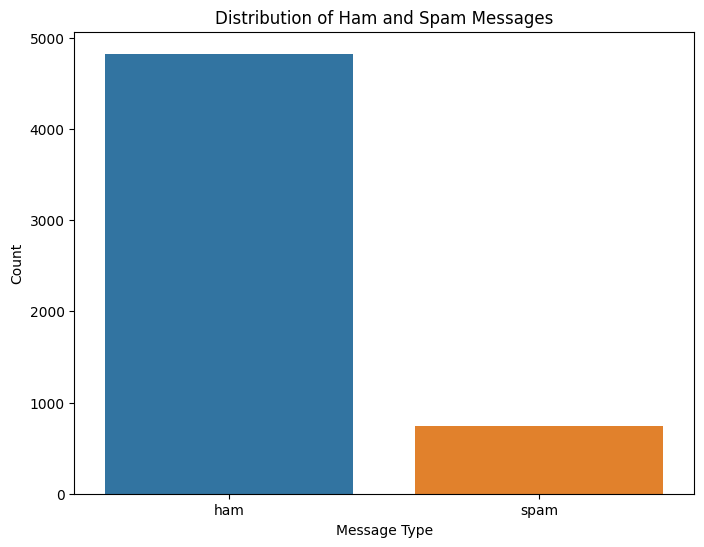

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x="Result", data=raw_df)
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [40]:
# Encode the labels (spam or ham) to numerical values
label_encoder = LabelEncoder()
raw_df['Result'] = label_encoder.fit_transform(raw_df['Result'])
print(raw_df['Result'].value_counts())

Result
0    4825
1     747
Name: count, dtype: int64


Result

ham    0 ---> [Legitimat Messages]

spam   1 ----> [Spam Messages]

In [41]:
# Split the dataset into training and testing sets
X = raw_df['Message']
y = raw_df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [42]:
# Transform the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [43]:
# Initialize the models
logistic_regression_model = LogisticRegression()
svm_model = SVC(kernel="rbf",gamma="scale",probability=True)
naive_bayes_model = MultinomialNB()

In [44]:
# Train the models
logistic_regression_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
naive_bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [45]:
# Make predictions
lr_predictions = logistic_regression_model.predict(X_test_tfidf)
acc1= accuracy_score(y_test, lr_predictions)
svm_predictions = svm_model.predict(X_test_tfidf)
acc2=accuracy_score(y_test, svm_predictions)
nb_predictions = naive_bayes_model.predict(X_test_tfidf)
acc3=accuracy_score(y_test, nb_predictions)

**Evaluate the models**

Logistic Regression Performance

In [46]:
# Evaluate the models
print("Logistic Regression Performance:")
print(f'Accuracy: {acc1*100:.2f}%')
print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

Logistic Regression Performance:
Accuracy: 95.25%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

[[962   3]
 [ 50 100]]


Support Vector Machine Performance

In [47]:
print("\nSVM Performance:")
print(f'Accuracy: {acc2*100:.2f}%')
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))


SVM Performance:
Accuracy: 97.67%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[964   1]
 [ 25 125]]


Naive Bayes Performance

In [48]:
print("\nNaive Bayes Performance:")
print(f'Accuracy: {acc3*100:.2f}%')
print(classification_report(y_test, nb_predictions))
print(confusion_matrix(y_test, nb_predictions))


Naive Bayes Performance:
Accuracy: 96.68%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[965   0]
 [ 37 113]]


***Interpretation of Results***

***The SVM model achieved the highest accuracy (97.67%), followed by the Naive Bayes model (96.68%), and the Logistic Regression model (95.25%).***

***Each model's performance is evaluated based on precision, recall, and F1-score, indicating how well the model distinguishes between spam and ham messages.***

***The confusion matrices provide insight into the number of true positive, true negative, false positive, and false negative predictions made by each model.***